# Random Forest Project 

For this project I used publicly available data from [LendingClub.com](www.lendingclub.com). I used lending data from 2007-2010 and to try to classify and predict whether or not the borrower paid back their loan in full.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

In [3]:
#Import the usual libraries for pandas and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [4]:
#read loan_data.csv as a dataframe called loans
loans = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [5]:
#Check out the info() methods on loans
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
#Check out the head() methods on loans
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
##Check out the describe() methods on loans.
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

Text(0.5,0,'FICO Score')

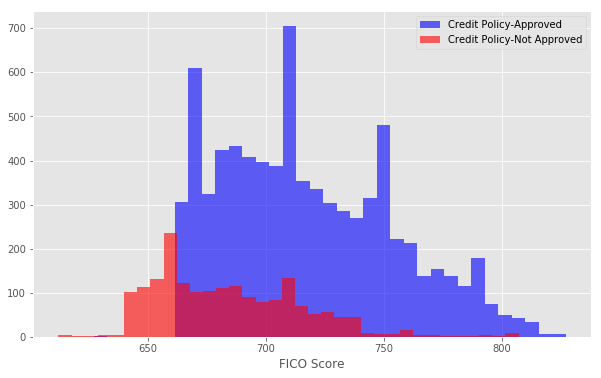

In [87]:
#Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(bins=35, color='blue',label='Credit Policy-Approved', alpha=.6)
loans[loans['credit.policy']==0]['fico'].hist(bins=35, color='red', label='Credit Policy-Not Approved', alpha=.6)
plt.legend()
plt.xlabel('FICO Score')

### Analysis:  

Credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.  As the FICO score increases, the number of customers who do not meet the credit underwriting criteria of LendingClub.com decreases.  Anyonoe with a FICO score below about 660 will automatically not meet the credit underwriting criteria of LendingClub.com.

** Create a similar figure, except this time select by the not.fully.paid column.**

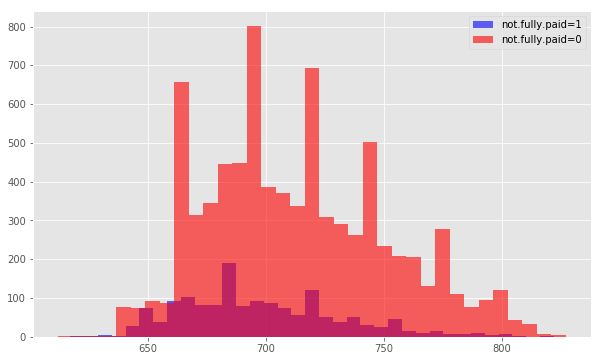

In [23]:
#Create a histogram of two FICO distributions on top of each other, one for each not.fully.paid outcome
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(bins=35, color='blue',label='not.fully.paid=1', alpha=.6)
loans[loans['not.fully.paid']==0]['fico'].hist(bins=35, color='red', label='not.fully.paid=0', alpha=.6)
plt.legend()

### Analysis:   

The majority of people are fully paying down their loan.  There is a similar proportion of fully paid and not fully paid.  There is not the same sharp cutoff as with underwriting.  The spikes are just the way FICO scoring works.

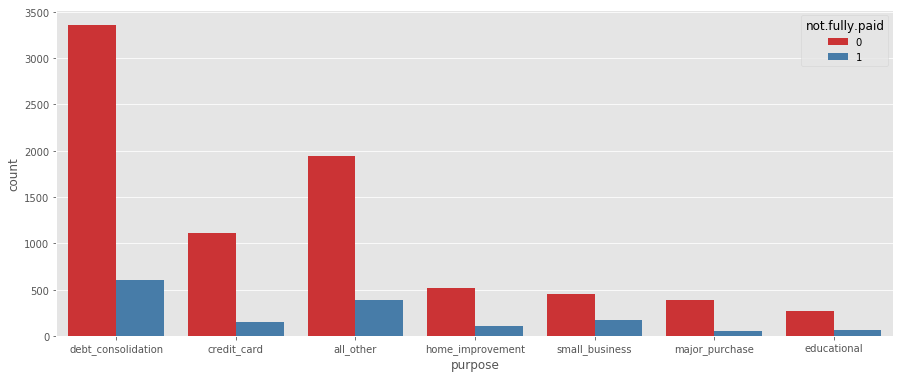

In [32]:
#Create a countplot using seaborn showing the counts of loans by purpose
plt.figure(figsize=(15,6))
sns.countplot(x=loans['purpose'], y=None, hue=loans['not.fully.paid'], data=None, order=None, hue_order=None, orient=None, 
              color=None, palette='Set1', saturation=0.75, dodge=True, ax=None)

### Analysis: 

The top three variables associated wanting a loan are debt_consolidation, credit_card, and all_other.  Also, the ratio between fully paid and not fully paid seems to be pretty consistent throughout all the reasons.

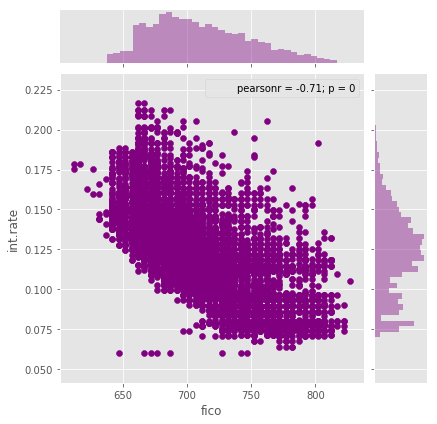

In [88]:
# trend between FICO score and interest rate
sns.jointplot(x='fico',y='int.rate',data=loans,kind='scatter', color='purple')

### Analysis:  

As one would expect, there is a clear inverse linear relationship between FICO score and interest rates.

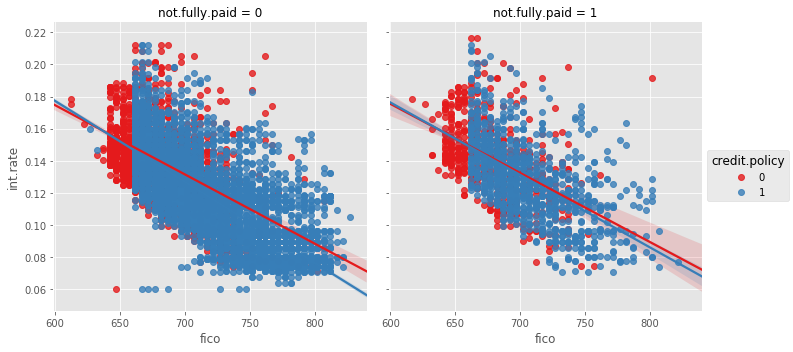

In [38]:
#trend between not.fully.paid and credit.policy
plt.figure(figsize=(11,7))
sns.lmplot(x='fico', y='int.rate', data=loans, hue='credit.policy', col='not.fully.paid', row=None, palette='Set1', col_wrap=None, size=5, 
           aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, 
           legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, 
           units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, 
           truncate=False, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None)

### Analysis:

Both graphs are very similar.  The relationship between interest rate and FICO score is independent of whether the loan was fully paid or not or whether or not the customers met the credit underwriting criteria of LendingClub.com or not.

# Setting up the Data

In [39]:
#check loans info
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features to Dummy Variables

In [41]:
cat_feats = ['purpose']

In [42]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [43]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

In [44]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

In [55]:
from sklearn.model_selection import train_test_split

In [69]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

In [71]:
#split your data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training a Decision Tree Model

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
#Create an instance of DecisionTreeClassifier() called dtree
dtree = DecisionTreeClassifier()

In [74]:
#fit the instance of DecisionTreeClassifier() to the training data.
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Predictions and Evaluation of Decision Tree

In [75]:
#Create predictions from the test set
predictions = dtree.predict(X_test)

In [76]:
from sklearn.metrics import classification_report,confusion_matrix

In [77]:
#create a classification report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.82      0.83      2431
          1       0.19      0.23      0.21       443

avg / total       0.75      0.73      0.74      2874



In [78]:
##create a confusion matrix.
print(confusion_matrix(y_test,predictions))

[[1983  448]
 [ 341  102]]


## Training the Random Forest model

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
#Create an instance of the RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)

In [81]:
#fit RandomForestClassifier to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## Predictions and Evaluation of Random Forest model

In [28]:
#Predict the class of not.fully.paid for the X_test data
rfc_pred = rfc.predict(X_test)

In [83]:
#create a classification report from the results
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.67      0.02      0.04       443

avg / total       0.82      0.85      0.78      2874



In [84]:
#Show the Confusion Matrix for the rfc_pred
print(confusion_matrix(y_test,rfc_pred))

[[2426    5]
 [ 433   10]]


## Result: Overall the random forest algorithm performed better than the decision tree algorithm.  However, not with regard to predicting the not fully paid sub-population.  Therefore, it depends on which sub-population is more important to the business to determine whether to use the decision tree or random forest algorithm.

RF: precision=.82; recall=.85; f1-score=.78
DT: precision=.75; recall=.73; f1-score=.74
